## Flu Shot Learning: Preparing Data to Predicting H1N1 and Seasonal Flu Vaccines

This is a competition dataset to predict whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors. Before one can start modeling, data needs to be prepared! In class we reviewed how we can impute Proline feature of the Wine dataset. In this assignment, you'll be reviewing a new dataset to impute missing data. Remember, discrete variables
[Continous vs Discrete](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/discrete-vs-continuous-variables/) variables need to be handled differently. Review and understand sections 1 and 2, and work on the question in section 3.

We will use the data from the [Flu Shots competition on Driven Data](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/). Please review the page for information about the features. 

Please submit your error-free jupyter notebook as well as a PDF/HTML version of your jupyter notebook. 
Do not share outside of this class.

### (1) Understand the Data

In [20]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [21]:
# read data into csv
base_url = "https://raw.githubusercontent.com/jojoduquartier/"
repo_branch = "decentpythonhowtos/master/"
data_set = "training_set_features_driven_data_flu_shots.csv"
health_df = pd.read_csv(base_url + repo_branch + data_set)
health_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


#### How much of the health insurance data missing?

This is a survey data and most of the fields are relatable. Some of the features inhenrently have some ordering (age_group, education) and other do not (sex, race, rent_or_own) etc. Let's quickly look at the percentage of missing data per column:

In [22]:
# How large is the original dataset?
len(health_df)

26707

In [23]:
#Number of columns
len(health_df.columns)

36

In [24]:
# column name, % of the missing data in the column
(100 * pd.isnull(health_df).sum() / len(health_df)).sort_values(ascending=False)

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_children              0.932340
household_adults                0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

In [25]:
value_count = health_df['health_insurance'].value_counts().reset_index(name='count')
value_count

,health_insurance,count
0,1.0,12697
1,0.0,1736


The data appears to have 2 options for health insurance, 1 for yes, and 2 for no, and almost 46% didn't respond. 

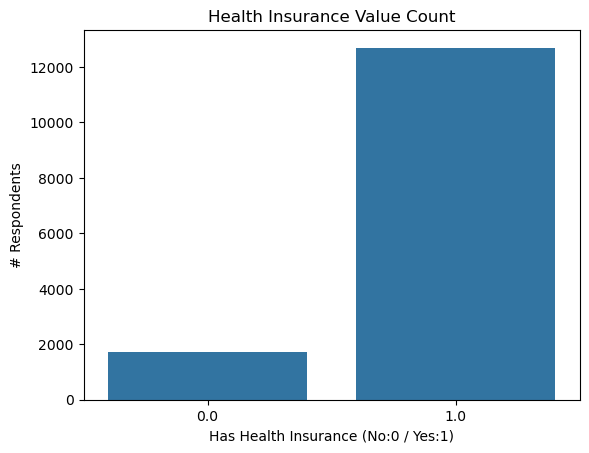

In [26]:
# If your data is from value_counts() as shown in your earlier code:
value_count = health_df['health_insurance'].value_counts().reset_index(name='count')
# Create the bar plot
ax = sns.barplot(x='health_insurance', y='count', data=value_count)
# Set the labels and title
ax.set_xlabel('Has Health Insurance (No:0 / Yes:1)')
ax.set_ylabel('# Respondents')
ax.set_title('Health Insurance Value Count')
plt.show()

#### How can we approach imputing the missing values?

We cannot really use **Mean**, **Median** or **Mode** values to fill in missing values for the `health_insurance` column.

The **mean** here will not be 1 or 0, it would just be a new category so we could do `health_df['health_insurance'].fillna(2)` or any other constant other than 0 and 1.

Both the **median** and the **mode** would be 1 and using 1 would indicate that all the respondents that did not provide their health insurance status were actually covered by insurance. This would mean that over 95% of the respondents were covered in 2009. This could be true but considering health insurance [coverage rates in the US in 2009](https://www.npr.org/sections/health-shots/2010/09/16/129908672/number-of-insured-americans-dropped-in-2009), it could also be an exaggeration. Depending on how representative of the US population this survey's respondents were, using **median** or **mode** could be justified.

There is no outright solution to this problem, different techniques could be used and evaluated in parallel with the machine learning building process.


### (2) Imputation by Adding a New Category
This is a survey data and it might be possible that everyone that did not answer the question on health insurance just we're not sure whether they had it or not. We could quantify this similarity by simply assigning them all a category other than 0 and 1. This could work since ML is good at identifying patterns of similarity!

In [27]:
# Impute missing values with 2 (Not Sure)
health_df['health_insurance_imputed'] = health_df['health_insurance'].fillna(2)

# Create value counts and plot
value_count = health_df['health_insurance_imputed'].value_counts().reset_index(name='count')

value_count

,health_insurance_imputed,count
0,1.0,12697
1,2.0,12274
2,0.0,1736


Text(0.5, 1.0, 'Health Insurance Value Count')

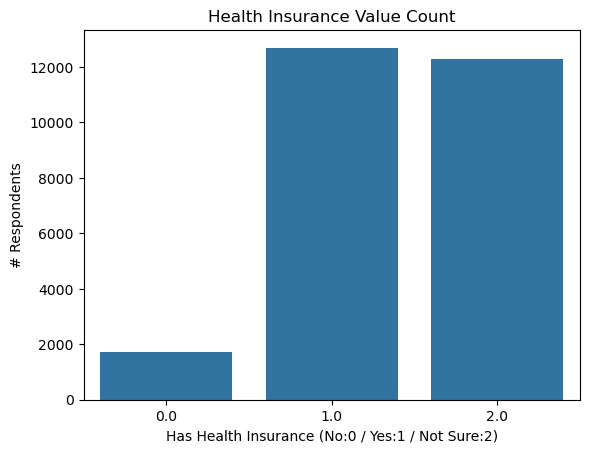

In [28]:
# Create bar plot
ax = sns.barplot(x='health_insurance_imputed', y='count', data=value_count)

# Set plot labels and title
ax.set_xlabel('Has Health Insurance (No:0 / Yes:1 / Not Sure:2)')
ax.set_ylabel('# Respondents')
ax.set_title('Health Insurance Value Count')

### (3) Imputation by Using Public Knowledge
We could look at the national data on health insurance coverage to identify what percentage of the population had some coverage and try to pick a random subset of the data (with missing healthcare) and set them to 1 so that the full dataset is representative of the national distribution. Let's assume 84% of the population had coverage, and 16% didn't have coverage. 

In [29]:
# 84% of the population had coverage and 16 did not
# first let's see what the percentages are right now
covered_pct = (
    (health_df['health_insurance'] == 1).sum() / len(health_df)
    ).round(2)

print(f"{100 * covered_pct}% of the data is covered, we must bring it to 84%\n")

needed_number = int(round((.84 - covered_pct) * len(health_df)))
needed_number # how many of the records need to be updated to reach 84%?

48.0% of the data is covered, we must bring it to 84%



9615

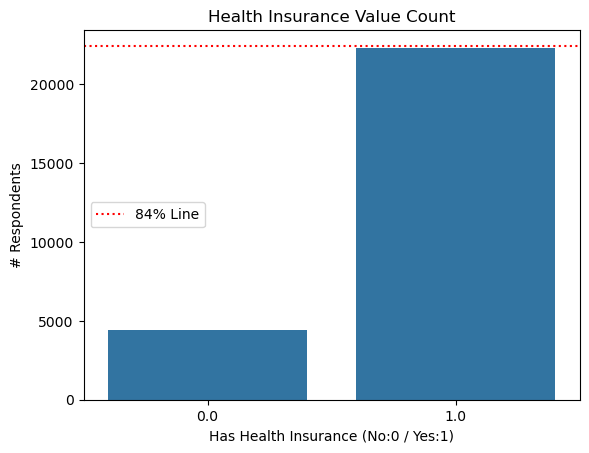

In [30]:
# random sample
null_health_insurance = health_df.loc[
  pd.isnull(health_df['health_insurance']), 'health_insurance'
].copy()
indices_fill = null_health_insurance.sample(
    needed_number, random_state=10
).index.values

# now fill in 1 for those indices
health_df['health_insurance_imputed_ntl'] = health_df['health_insurance'].copy()
health_df.loc[indices_fill, 'health_insurance_imputed_ntl'] = 1
health_df['health_insurance_imputed_ntl'] = health_df[
  'health_insurance_imputed_ntl'
  ].fillna(0)

# plot
value_count = health_df[
  'health_insurance_imputed_ntl'
].value_counts().reset_index(name='count')
ax = sns.barplot(x='health_insurance_imputed_ntl', y='count', data=value_count)
_ = ax.set_xlabel('Has Health Insurance (No:0 / Yes:1)')
_ = ax.set_ylabel('# Respondents')
_ = ax.set_title('Health Insurance Value Count')

# 84% of the data
ntl_threshold = .84 * len(health_df)
_ = ax.axhline(
    y=round(ntl_threshold), color='r', linestyle=':', label='84% Line')
_ = ax.legend()

### (4) Imputation by Prediction: Predict Health Insurance
Similar to the Linear Regression for the Continuous Variables part, it is possible to build a Machine Learning model (classifier in this case) to predict the missing values in the `health_insurance` column. 

In [31]:
# add as many cells as needed! 
# Building a classifier for the `health_insurance` column
  # Think about which columns could help identify if someone had coverage
  # Visualize these columns and try building a classifer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [32]:
df_model = health_df.copy()

feature_columns = [
    # Demographic factors
    'age_group', 'sex', 'race', 
    'education', 'marital_status',
    'household_adults', 'household_children',
    
    # Economic factors
    'income_poverty', 'employment_status', 'rent_or_own',
    
    # Geographic factors
    'hhs_geo_region', 'census_msa',
    
    # Health-related factors
    'chronic_med_condition', 'health_worker',
    
    # Behavioral indicators
    'h1n1_concern', 'h1n1_knowledge',
    'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands',
    'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face'
]

In [38]:
known_insurance_df = health_df[health_df["health_insurance"].notnull()].copy()
missing_insurance_df = health_df[health_df["health_insurance"].isnull()].copy()

In [40]:
numeric_cols = []
categorical_cols = []

for col in feature_columns:
    if pd.api.types.is_numeric_dtype(known_insurance_df[col]):
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['household_adults', 'household_children', 'chronic_med_condition', 'health_worker', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face']
Categorical columns: ['age_group', 'sex', 'race', 'education', 'marital_status', 'income_poverty', 'employment_status', 'rent_or_own', 'hhs_geo_region', 'census_msa']


Columns excluded:
'employment_occupation' and 'employment_industry' due to having 49-50% missing data.
'health_insurance' because of the 46% missing data and this is the target variable.
'doctor_recc_h1n1' and 'doctor_recc_seasonal' had 8% missing data.
Opinion-related columns ('opinion_h1n1_risk') as these features have a less direct relationship with the insurance status.

In [33]:
# Label encoders for categorical variables
label_encoders = {}
for column in feature_columns:
    if df_model[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        # Fill NA with most common value
        df_model[column].fillna(df_model[column].mode()[0], inplace=True)
        df_model[column] = label_encoders[column].fit_transform(df_model[column])
    else:
        # Fill numeric NA with median
        df_model[column].fillna(df_model[column].median(), inplace=True)


/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1516/3892134003.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model[column].fillna(df_model[column].mode()[0], inplace=True)
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1516/3892134003.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [34]:
# Splitting into train the known health insurance status and predict unknown status
train_df = df_model[df_model['health_insurance'].notna()]
predict_df = df_model[df_model['health_insurance'].isna()]

# Prepararing training data
X_train = train_df[feature_columns]
y_train = train_df['health_insurance']

# Spliting training data into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

RandomForestClassifier(random_state=42)

In [35]:
val_predictions = rf_model.predict(X_val)
print("\nModel Validation Results:")
print(classification_report(y_val, val_predictions))

# Making predictions for missing values
X_predict = predict_df[feature_columns]
predictions = rf_model.predict(X_predict)

health_df['health_insurance_imputed_ml'] = health_df['health_insurance'].copy()
health_df.loc[health_df['health_insurance'].isna(), 'health_insurance_imputed_ml'] = predictions

# Predicted values
print("\nDistribution of predicted health insurance values:")
print(pd.value_counts(predictions))


Model Validation Results:
              precision    recall  f1-score   support

         0.0       0.64      0.16      0.25       357
         1.0       0.89      0.99      0.94      2530

    accuracy                           0.88      2887
   macro avg       0.76      0.57      0.59      2887
weighted avg       0.86      0.88      0.85      2887


Distribution of predicted health insurance values:
1.0    11969
0.0      305
Name: count, dtype: int64


/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1516/3593817077.py:14: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(predictions))


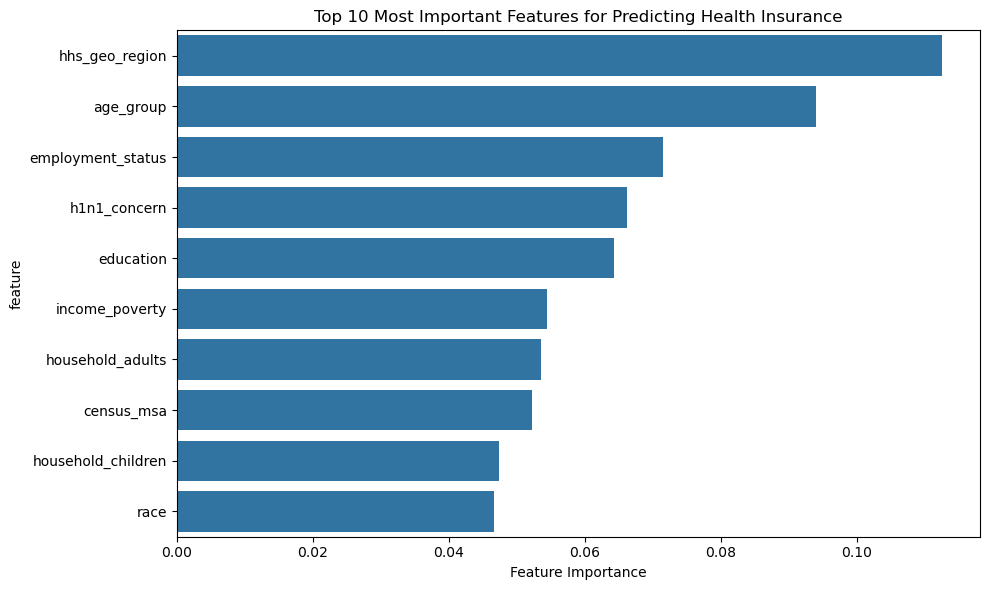

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1516/782765973.py:17: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  original_dist = pd.value_counts(health_df['health_insurance'])
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1516/782765973.py:18: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  predicted_dist = pd.value_counts(health_df['health_insurance_imputed_ml'])


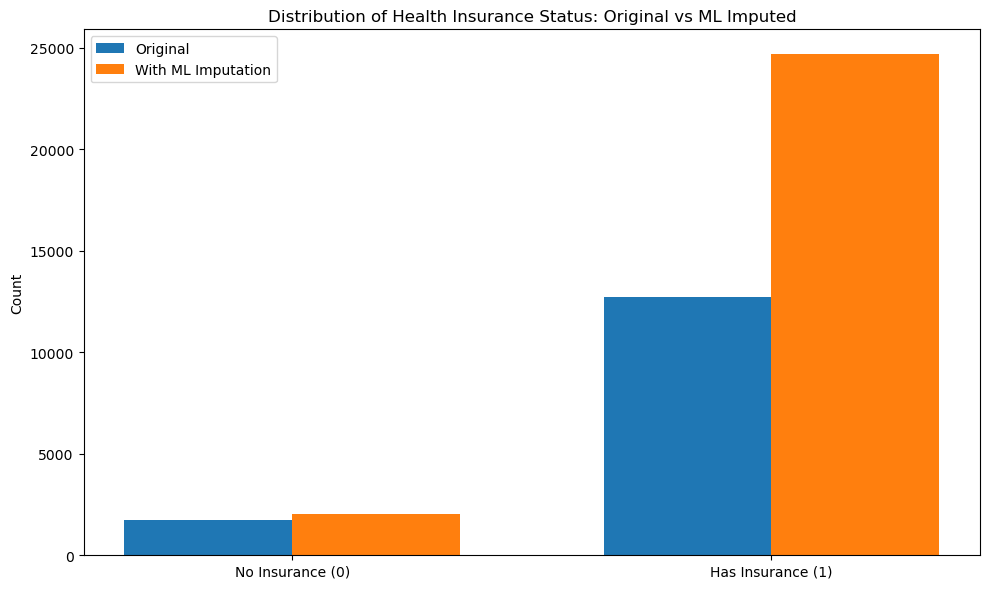

In [36]:
# Feature importances
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features for Predicting Health Insurance')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Distribution comparison
plt.figure(figsize=(10, 6))
original_dist = pd.value_counts(health_df['health_insurance'])
predicted_dist = pd.value_counts(health_df['health_insurance_imputed_ml'])

width = 0.35
x = np.arange(2)
plt.bar(x - width/2, [original_dist.get(0, 0), original_dist.get(1, 0)], width, label='Original')
plt.bar(x + width/2, [predicted_dist.get(0, 0), predicted_dist.get(1, 0)], width, label='With ML Imputation')

plt.xticks(x, ['No Insurance (0)', 'Has Insurance (1)'])
plt.ylabel('Count')
plt.title('Distribution of Health Insurance Status: Original vs ML Imputed')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# Statistics
print("\nOriginal distribution of known values:")
print(pd.value_counts(health_df['health_insurance'], normalize=True))

print("\nDistribution after ML imputation:")
print(pd.value_counts(health_df['health_insurance_imputed_ml'], normalize=True))

# Accuracy metrics
print("\nValidation Accuracy:", accuracy_score(y_val, val_predictions))


Original distribution of known values:
health_insurance
1.0    0.87972
0.0    0.12028
Name: proportion, dtype: float64

Distribution after ML imputation:
health_insurance_imputed_ml
1.0    0.923578
0.0    0.076422
Name: proportion, dtype: float64

Validation Accuracy: 0.8846553515760305


/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1516/1292939884.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(health_df['health_insurance'], normalize=True))
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1516/1292939884.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(health_df['health_insurance_imputed_ml'], normalize=True))


### (5) Ungraded challenge: Join the competition! 
The data was taken from a ML competition site, try entering this competition (it's for learning purposes)